In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np
import os

In [2]:
model_lenet5_only = keras.models.load_model("C:/Users/pc/Documents/pythonProjects/OPSI2023/ONLY LeNet5 tanpa apaapa/lenet5only.h5")#"C:/Users/pc/Documents/pythonProjects/OPSI/ONLY LeNet5 tanpa apaapa/lenet5only.h5")

In [3]:
IMAGE_SIZE = (100,100)
def valid_load_images():
    image = []
    label = []
    image_path = []
    VALID_FOLDER_PATH = "C:/Users/pc/Documents/pythonProjects/OPSI2023/images/valid" #ada sebanyak 3421 image
    for folder_name in os.listdir(VALID_FOLDER_PATH):
        for filename in os.listdir(os.path.join(VALID_FOLDER_PATH,folder_name)):
            print(filename)
            subfolder_path = os.path.join(folder_name,filename)
            img = cv2.imread(os.path.join(VALID_FOLDER_PATH,subfolder_path))
            img = cv2.resize(img,IMAGE_SIZE)
            image.append(img)
            label.append(folder_name)
            image_path.append(os.path.join(VALID_FOLDER_PATH,subfolder_path))
    image = np.array(image)
    return image,label

In [4]:
valid_image, valid_label = valid_load_images()

000108 (7)(1).png
000108 (7).png
000108 (8)(1).png
000108 (8).png
000109 (3)(1).png
000109 (3).png
000109 (4)(1).png
000109 (4).png
000109 (8)(1).png
000109 (8).png
000110 (7)(1).png
000110 (7).png
000111 (2)(1).png
000111 (2).png
000112 (2)(1).png
000112 (2).png
000112 (9)(1).png
000112 (9).png
000113 (3)(1).png
000113 (3).png
000113(1).png
000113.png
000114 (10)(1).png
000114 (10).png
000114(1).png
000114.png
000115 (2)(1).png
000115 (2).png
000115 (5)(1).png
000115 (5).png
000115 (9)(1).png
000115 (9).png
000115(1).png
000115.png
000116 (3)(1).png
000116 (3).png
000116 (5)(1).png
000116 (5).png
000116 (8)(1).png
000116 (8).png
000116 (9)(1).png
000116 (9).png
000117 (6)(1).png
000117 (6).png
000117(1).png
000117.png
Malignant case (541).jpg
Malignant case (542).jpg
Malignant case (543).jpg
Malignant case (544).jpg
Malignant case (545).jpg
Malignant case (546).jpg
Malignant case (547).jpg
Malignant case (548).jpg
Malignant case (549).jpg
Malignant case (550).jpg
Malignant case (551).

In [5]:
prediction_val_raw = model_lenet5_only.predict(valid_image)

7/7 [==============================] - 0s 16ms/step


In [6]:
jenis_kanker = ["Adenocarcinoma (Ganas)","Kanker Ganas","Kanker Jinak", "Sehat", "Sel Besar Karsinoma (Ganas)", "Sel Kanker Skuamous (Ganas)"]
banyak_kesalahan = 0
for i in  range(len(prediction_val_raw)):
    if jenis_kanker[np.argmax(prediction_val_raw[i])] != valid_label[i]:
        banyak_kesalahan += 1
        print("DATA KE-", i)
        # print("Prediksi: " + jenis_kanker[np.argmax(prediction_val_raw[i])])
        # print("Kunci Jawaban :", valid_label[i])
        # print()
print(banyak_kesalahan)

DATA KE- 16
DATA KE- 17
DATA KE- 26
DATA KE- 27
DATA KE- 32
DATA KE- 33
DATA KE- 40
DATA KE- 41
DATA KE- 42
DATA KE- 43
DATA KE- 146
DATA KE- 147
DATA KE- 150
DATA KE- 151
DATA KE- 156
DATA KE- 157
DATA KE- 180
DATA KE- 181
DATA KE- 190
DATA KE- 191
DATA KE- 208
DATA KE- 209
DATA KE- 212
DATA KE- 213
24


In [7]:
print("Akurasi pada sesi validasi adalah " + str((len(valid_image) - banyak_kesalahan) / len(valid_image)))

Akurasi pada sesi validasi adalah 0.8878504672897196


In [8]:
from sklearn.preprocessing import OneHotEncoder
label_encoder = OneHotEncoder()
valid_label_index = np.reshape(valid_label,(-1,1))
valid_label_index = label_encoder.fit_transform(valid_label_index).toarray()
np.argmax(valid_label_index[50])

1

In [9]:
prediction_val_index = []
valid_label_indexs = []
for i in range (len(prediction_val_raw)):
    prediction_val_index.append(np.argmax(prediction_val_raw[i]))

for j in range(len(valid_label_index)):
    valid_label_indexs.append(np.argmax(valid_label_index[j]))

In [10]:
from sklearn.metrics import classification_report
print(classification_report(valid_label_indexs,prediction_val_index))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        46
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        66
           4       0.89      0.81      0.85        42
           5       0.71      0.80      0.75        30

    accuracy                           0.89       214
   macro avg       0.90      0.90      0.90       214
weighted avg       0.89      0.89      0.89       214



In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(valid_label_indexs,prediction_val_index)
print(cm)

[[36  0  0  0  4  6]
 [ 0 21  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0 66  0  0]
 [ 4  0  0  0 34  4]
 [ 6  0  0  0  0 24]]


Text(208.22222222222223, 0.5, 'Aktual')

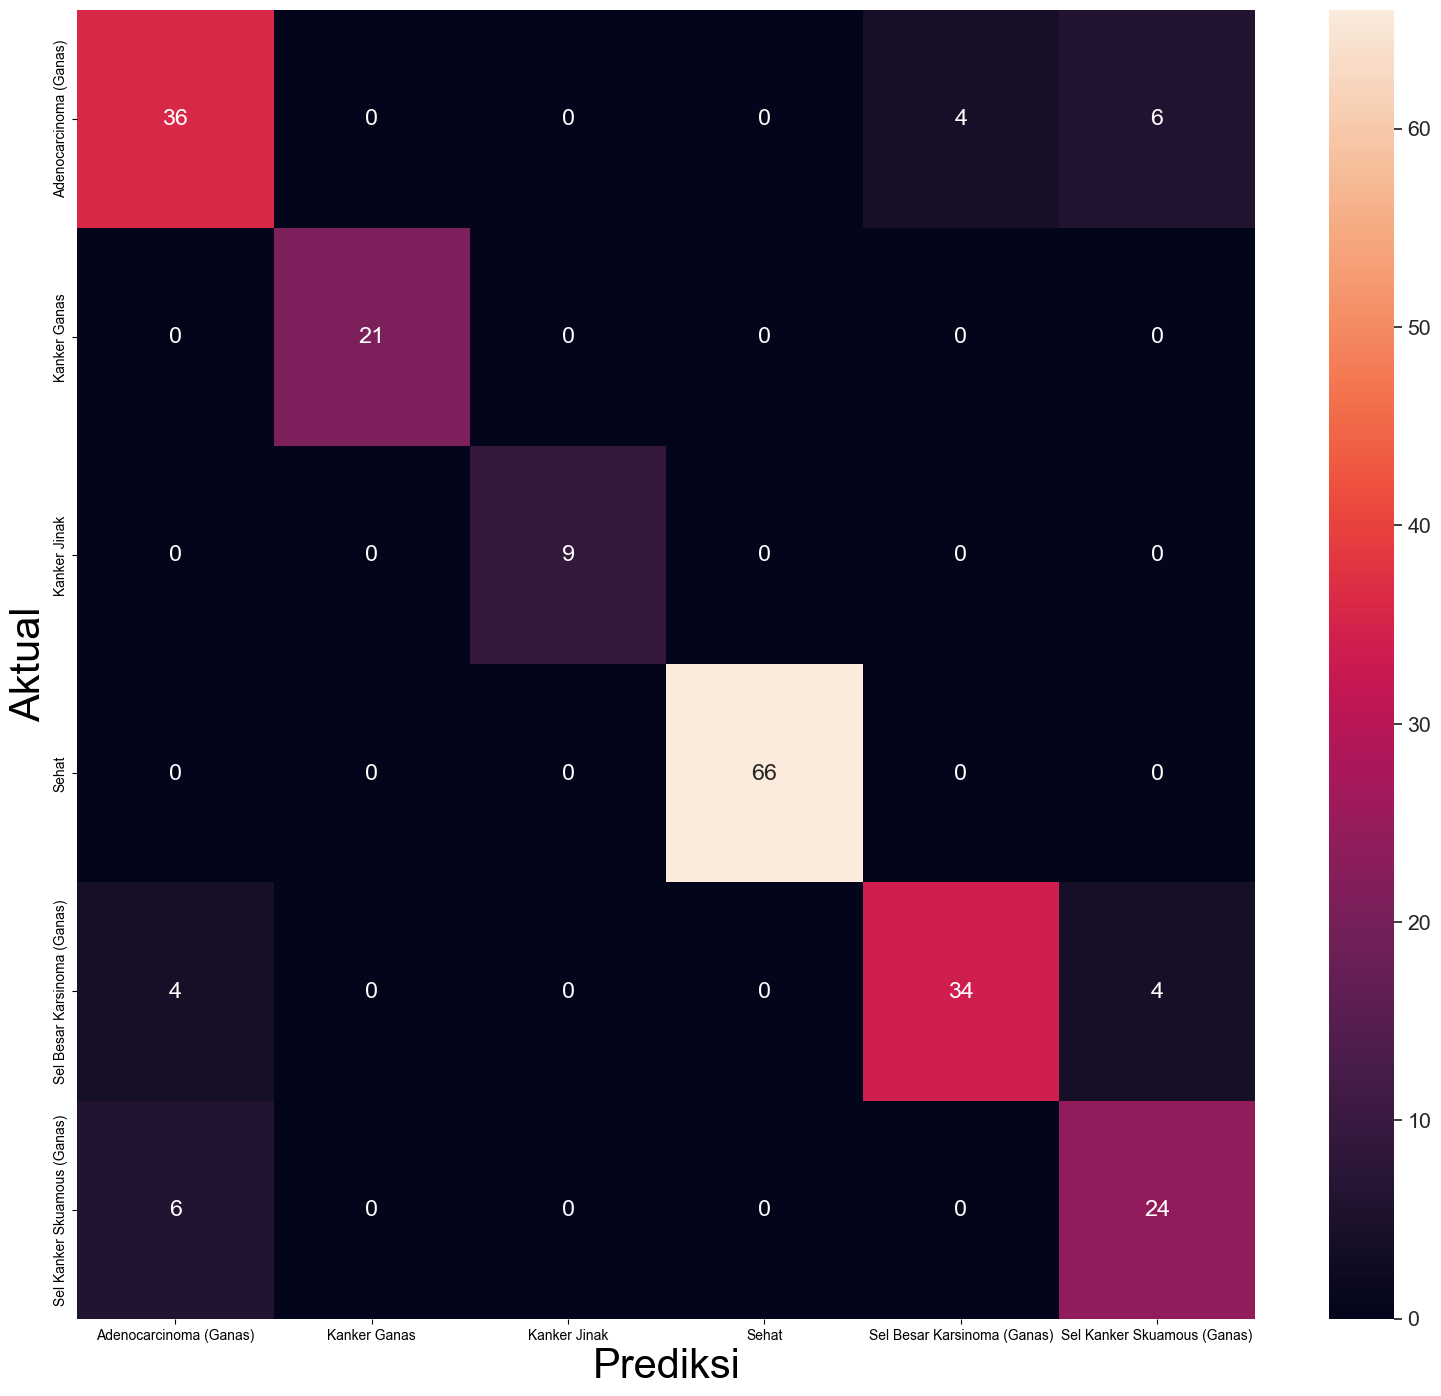

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(19,17))
ax = plt.gca()

sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True) # font size

ax.xaxis.set_ticklabels(jenis_kanker,size=10) 
ax.yaxis.set_ticklabels(jenis_kanker,size=10)

ax.set_xlabel('Prediksi',fontsize=30)
ax.set_ylabel('Aktual',fontsize=30) 
